In [ ]:
# train data와 test데의 데이터 형을 동일하게 하기 위해서 묶어놓고 전처리를 진행하는 것으로 보임.
# 1. 필요한 라이브러리 임포트 pandas, numpy
# 2. 데이터 불러오기 / eda / 데이터 타입 확인하기
    # 데이터 개요 파악 : head(), describe(), shape, dtypes, value_counts()
# 3. 시각화에 필요한 라이브러리 임포트 matplotlib, seaborn
    # 
# 4. 전처리할 데이터 Fare, Name, Parch, SibSp
    # train, test 데이터를 합해줌. > sort=False로 행순서를 바뀌지 않게함.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('./data_set/train.csv')
test_df = pd.read_csv('./data_set/test.csv')
submission = pd.read_csv('./data_set/gender_submission.csv')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.style.use('ggplot')

<Axes: xlabel='Embarked'>

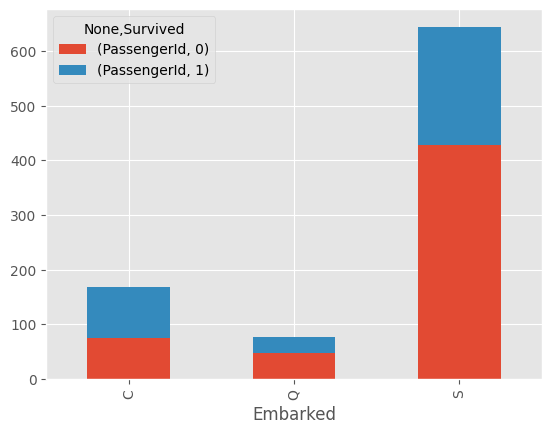

In [12]:
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df.plot.bar(stacked= True)

In [14]:
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] +  embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<Axes: xlabel='Pclass'>

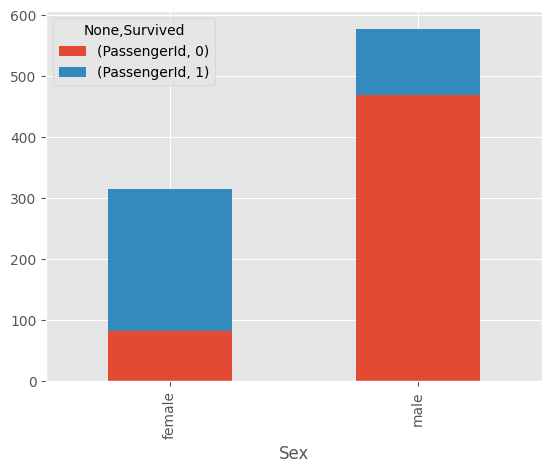

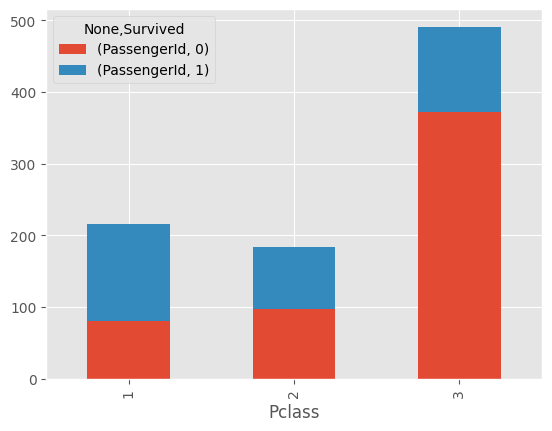

In [21]:
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

(array([[ 24.,  45., 120., 101.,  62.,  38.,  22.,  11.,   1.],
        [ 62.,  77., 180., 178., 102.,  65.,  35.,  13.,   2.]]),
 array([ 0.42      ,  9.26222222, 18.10444444, 26.94666667, 35.78888889,
        44.63111111, 53.47333333, 62.31555556, 71.15777778, 80.        ]),
 <a list of 2 BarContainer objects>)

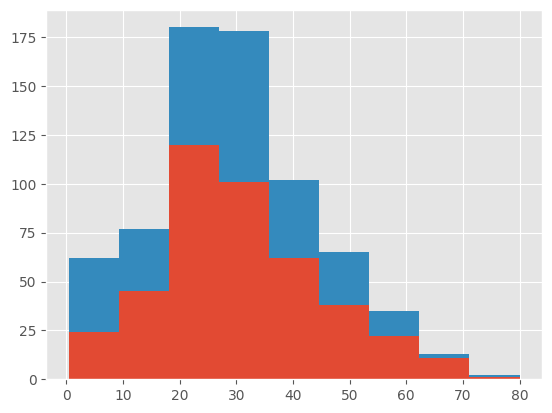

In [22]:
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived == 1]], bins = 9, histtype='barstacked', label=['death, survived'])

# 데이터 전처리 

In [23]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [30]:
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

In [33]:
Fare_mean.columns = ["Pclass", "Fare_mean"]
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [34]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis = 1)

In [43]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

Name 호칭 변경하기

In [66]:
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [75]:
name_df = all_df["Name"].str.split("[,.]", expand=True)
name_df.columns = ["family_name", "honorific", "name", "_"]


In [77]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [81]:
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

호칭별 연령 분포

In [82]:
all_df = pd.concat([all_df, name_df], axis=1)
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,_
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None


<Axes: xlabel='honorific', ylabel='Age'>

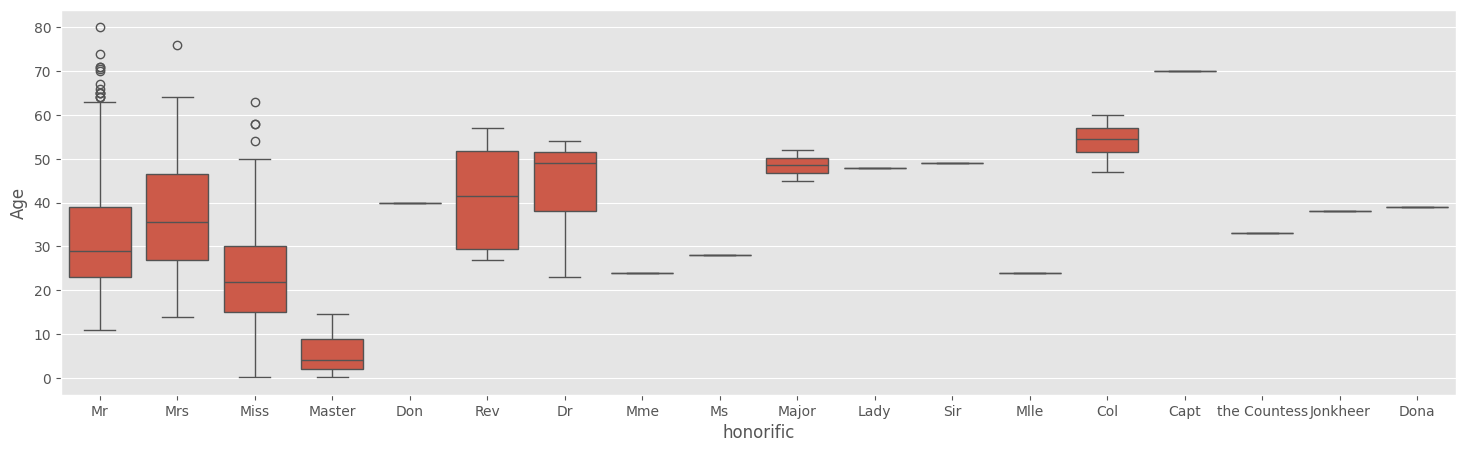

In [83]:
plt.figure(figsize=(18,5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [84]:
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


호칭별 생존률 차이 확인

In [85]:
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)],axis=1)

In [86]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None


<Axes: xlabel='honorific'>

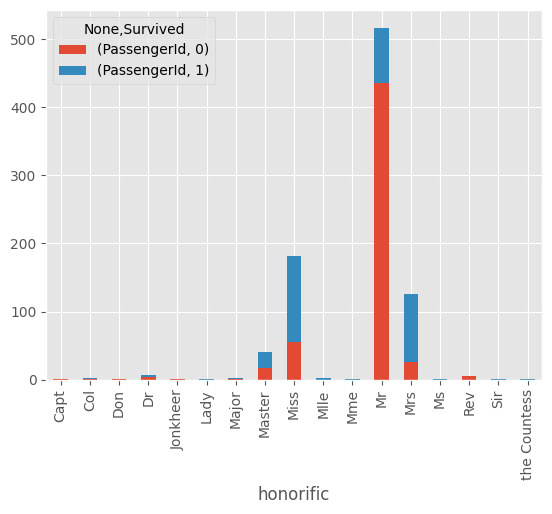

In [91]:
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked= True)

연령의 결측치를 호칭별 평균 연령으로 보완하기

In [93]:
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]

In [96]:
all_df= all_df.drop(["honorific_Age"], axis=1)

In [97]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [98]:
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)

/var/folders/d4/4wc2d_0j5vv5zqznm4l6905c0000gn/T/ipykernel_36883/918613031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0, inplace=True)


In [99]:
all_df = all_df.drop(["PassengerId", "Name", "family_name", "_", "name", "Ticket", "Cabin"], axis = 1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


카테고리 변수를 수치로 변환하기

In [100]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


Mr, Miss, Mrs, Master 이외는 other로 통합하기

In [101]:
all_df.loc[~((all_df["honorific"]=="Mr")|(all_df["honorific"] == "Miss")|(all_df["honorific"] == "Mrs") | (all_df["honorific"] == "Master")), "honorific"] = "other"

In [102]:
all_df["honorific"].value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

문자열을 수치로 변환하기 : 라벨 인코딩

원-핫 인코딩 : 해당하는 항목은 1, 해당하지 않는 모든 항목은 0으로 표시한다.
라벨 인코딩 : 변수 선택을 숫자로 변환, 숫자의 대소는 의미가 없음.

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
all_df['Embarked'].fillna('missing', inplace=True)

In [106]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [107]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if(all_df[cat].dtypes == "object"):
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [108]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


이제 모든 데이터를 train data와 test data로 변경하기

In [109]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

**머신 러닝 모델링**

결정트리 : 역치 조건에 따라 데이터 분기를 반복하는 것. 회귀 및 분류에 사용하는 방법<br/>
역치 조건은 원래 데이터가 어떤 조건에 따라 다른 성질을 갖는 두 데이터로 잘 나뉘었는가로 자동으로 결정됨<br/>

결정트리는 출력될 때까지 과정을 비교적 파악하기 쉬움 <br/>
하지만 이상치에 약하고 처음 분기가 치우치면 이후 분기들 모두 정확도가 나빠짐 <br/>
따라서 결정트리를 여러개 만들어서 합하는 랜덤 포레스트(앙상블) 방법이 제안됨
<br/>

LightGBM : 최근에는 병렬로 앙상블하는 것이 아니라 결정 트리를 순서대로 갱신해 나가는 그레이디언트 부스팅 결정트리 기법이 제안됨. 이것을 구현하는 방법 중 하나가 LightGBM임. <br/>
그레이디언트 부스팅 결정트리 구현 방법에는 LightGBM과 XGBoost가 있음.

In [110]:
import lightgbm as lgb

위에서 전처리한 데이터를 바탕으로 한 결정트리 모델을 만들 것임. <br/>
과적합, 과소적합을 피하도록 튜닝하는 것이 머신러닝에서는 중요함.<br/>
과적합을 피하기 위해서는 학습데이터에서 검증 데이터를 분리하는 과정이 필요함.<br/>
검증 데이터는 다양한 방법으로 작성할 수 있음<br/>

<br/>
1. 홀드아웃 : 일정 비율로 학습 / 검증 데이터를 분할<br/>
2. 교차 검증 : 데이터 전체를 임의 수의 블록으로 분할해서 그중 블록 한 개는 검증, 나머지는 학습 데이터로 만들고 -> 이것을 분할된 데이터의 수만큼 반복함. 더 많은 데이터로 미지의 데이터에 대한 정확도를 검증할 수 있어서 더욱 좋은 모델을 만들 수 있음<br/>
3. 잭나이프 : 전체 테스트 중 하나를 검증 나머지를 학습 데이터로 하는 과정을 전체 데이터 수만큼 반복하는 방법임.
